##Query Tag Prediction 
The aim of this project is to predict 'tag1' given a customer query.

In [1]:
!git clone https://github.com/asingh86/query_tag_prediction.git

Cloning into 'query_tag_prediction'...
remote: Enumerating objects: 144, done.
remote: Counting objects: 100% (144/144), done.
remote: Compressing objects: 100% (87/87), done.
remote: Total 144 (delta 67), reused 101 (delta 36), pack-reused 0
Receiving objects: 100% (144/144), 516.18 KiB | 5.21 MiB/s, done.
Resolving deltas: 100% (67/67), done.


In [1]:
#change working directory
import os
os.chdir('query_tag_prediction')
os.listdir()

['model_files',
 'README.md',
 'colab_notebook.ipynb',
 'images',
 'utils',
 '__pycache__',
 'colab_requirements.txt',
 'app.py',
 'data',
 '.git',
 '.idea',
 'model',
 'local_notebook.ipynb',
 'transformer.py',
 'requirements.txt',
 'configs',
 '.ipynb_checkpoints',
 '.gitignore']

We need manually create 2 folders in this directory:

1. 'data' - This folder contains raw data and the 'anonymous labeled conversations.json' needs to be manually uploaded in here.
2. 'model_files' - This folder will contain the saved model and history file.
and install the below requirements

In [4]:
pip install -r colab_requirements.txt

     |████████████████████████████████| 8.6 MB 4.5 MB/s 
     |████████████████████████████████| 42 kB 733 kB/s 
     |████████████████████████████████| 1.5 MB 64.7 MB/s 
     |████████████████████████████████| 41 kB 406 kB/s 
     |████████████████████████████████| 636 kB 47.9 MB/s 
     |████████████████████████████████| 22.3 MB 1.5 MB/s 
     |████████████████████████████████| 4.3 MB 52.0 MB/s 
     |████████████████████████████████| 12.9 MB 36 kB/s 
     |████████████████████████████████| 428 kB 68.2 MB/s 
     |████████████████████████████████| 392 kB 62.8 MB/s 
     |████████████████████████████████| 55 kB 3.0 MB/s 
     |████████████████████████████████| 296 kB 60.6 MB/s 
     |████████████████████████████████| 52 kB 624 kB/s 
     |████████████████████████████████| 77 kB 5.6 MB/s 
     |████████████████████████████████| 112 kB 42.9 MB/s 
     |████████████████████████████████| 56 kB 3.6 MB/s 
  Attempting uninstall: tornado
    Found existing installation: tornado 5.1.1
    Uni

Below is some sample data including the original and processed messages.

There is a seprate module implemented in utils.text_preprocessing which takes a piece of text and perform the following operations:

- converts text to lowercase
- remove manual characters i.e. '\n' etc.
- removes emojis
- remove punctuations
- remove other manual stopwords i.e hey, hi etc.

The above is an initial implementation of text pre-processing and one can build on this framework to add additional processing items/steps as there are other items that can be removed i.e. currencies, coded account details etc.

In [3]:
#sample data
from transformer import Transformer

t= Transformer()
queries = t.read_and_clean_data()
queries[0:10]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[{'original_message': '<p>I was unable to complete an eBay transaction with my card. I tried twice. First failure so far!</p>',
  'processed_message': 'i was unable to complete an ebay transaction with my card i tried twice first failure so far',
  'tag1': 'APP - Outage',
  'tag2': None,
  'tag3': None},
 {'original_message': "<p>Hi, I still haven't received my mondo card and it was expected on Monday.  I was told to contact you by the end of the week if it had not arrived, thanks!</p>",
  'processed_message': 'i still havent received my mondo card and it was expected on monday i was told to contact you by the end of the week if it had not arrived thanks',
  'tag1': 'CARD - Not Arrived',
  'tag2': None,
  'tag3': None},
 {'original_message': "<p>Hey, I'm liking the new app design but ever since this last update, I have to re-sign into the app (via the email magic link) practically every time I launch it. It's getting a little inconvenient!</p>",
  'processed_message': 'im liking the ne

In [4]:
#total sample in this datset
len(queries)

6869

<BarContainer object of 12 artists>

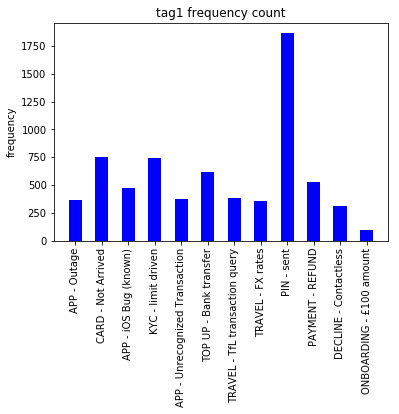

In [5]:
#Target distribution- The below indicates an imbalanced dataset and further steps can be taken to dela with it i.e 
#oversampling etc.
from matplotlib import pyplot as plt
freq={}
for i in queries:
    freq[i['tag1']] = freq.get(i['tag1'],0) + 1

plt.xticks(rotation=90)
plt.title("tag1 frequency count")
plt.ylabel("frequency")
plt.bar(freq.keys(), freq.values(), width=.5, color='b')

##Sampling 
Total sample is divided into training, validation and test set of .8,.1,.1. The dataset is quiet small. However, this is to showcase the methodology used.

##Model 
We have used a pre-trained Bert model and fine-tuned it after adding a dropout and dense layer in the end with 12 classes (one for each of the above class). This is a multi-class model with 12 classes. Further details can be found in the config file as well as in 'model' folder.

The model training takes approx 25 mins per epoch on a single TPU colab notebook. Therefore its only been trained on a small no of epochs (further info on model parameters can be found in config file).

##Model Loss 
Categorical crossentropy

##Model Training and Evaluation Metric 
Categorical Accuracy- We are computing the overall accuracy here. However, this can be further enhanced by looking at precision/recall values per class.

Another way to evaluate the model is by looking at precision/recall by top k predictions.

# New section

In [3]:
#Training and storing the model
import app
accuracy = app.model_fit_predict()

Epoch 1/5
170/170 [==============================] - 1434s 8s/step - loss: 2.4461 - categorical_accuracy: 0.2420 - val_loss: 2.2423 - val_categorical_accuracy: 0.2755
Epoch 2/5
170/170 [==============================] - 1454s 9s/step - loss: 1.9586 - categorical_accuracy: 0.3378 - val_loss: 1.8490 - val_categorical_accuracy: 0.3545
Epoch 3/5
170/170 [==============================] - 1410s 8s/step - loss: 1.8952 - categorical_accuracy: 0.3463 - val_loss: 1.8138 - val_categorical_accuracy: 0.3816
Epoch 4/5
170/170 [==============================] - 1443s 8s/step - loss: 1.8920 - categorical_accuracy: 0.3542 - val_loss: 1.8236 - val_categorical_accuracy: 0.3816
Epoch 5/5
170/170 [==============================] - 1485s 9s/step - loss: 1.8595 - categorical_accuracy: 0.3609 - val_loss: 1.8562 - val_categorical_accuracy: 0.3053


INFO:tensorflow:Assets written to: ./model_files/assets


INFO:tensorflow:Assets written to: ./model_files/assets


In [4]:
##Overall Categorical accuracy
# The below perform inference on test datset and provides an overall accuracy score. The overall accuracy score is
#low and this can be due to a couple of factors i.e. small dataset size etc. Also potential change in the learning rate
#and batch size can also help with performance improvements.

print(accuracy)

0.30567685
